In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def poly_least_squares(x, y, degree):
    x = np.array(x, dtype =float)
    y = np.array(y, dtype = float)

    # Construct Vandermonde matrix manually
    powers = np.arange(degree, -1, -1)  # [3, 2, 1, 0]
    A = x[:, None] ** powers  # shape (n, degree+1)
    
    # Compute normal equations: (A^T A) c = (A^T b)
    ATA = A.T @ A
    ATb = A.T @ y
    
    # Solve for coefficients
    coeffs = np.linalg.solve(ATA, ATb)
    return coeffs
# --- Dataset (a) ---
x_a = [0, 1, 2, 3, 4]
y_a = [1, 2.2, 3.9, 6.1, 8.0]
degree_a = 2

coeffs_a = poly_least_squares(x_a, y_a, degree_a)
print("Coefficients for Dataset (a):", coeffs_a)

# Compute MSE manually using loops
sum_sq_error_a = 0.0
for i in range(len(x_a)):
    y_pred = sum([coeffs_a[j]*x_a[i]**(degree_a-j) for j in range(degree_a+1)])
    diff = y_a[i] - y_pred
    sum_sq_error_a += diff**2
MSE_a = sum_sq_error_a / len(x_a)
print(f"Mean Squared Error (Dataset a): {MSE_a:.6f}")

# --- Dataset (b) ---
x_b = [-3, -2, -1, 0, 1, 2, 3]
y_b = [-2.5, -1.0, 0.5, 0.0, 0.6, 2.5, 1.0]
degree_b = 4

coeffs_b = poly_least_squares(x_b, y_b, degree_b)
print("Coefficients for Dataset (b):", coeffs_b)

# Compute MSE manually
sum_sq_error_b = 0.0
for i in range(len(x_b)):
    y_pred = sum([coeffs_b[j]*x_b[i]**(degree_b-j) for j in range(degree_b+1)])
    diff = y_b[i] - y_pred
    sum_sq_error_b += diff**2
MSE_b = sum_sq_error_b / len(x_b)
print(f"Mean Squared Error (Dataset b): {MSE_b:.6f}")


Coefficients for Dataset (a): [0.13571429 1.24714286 0.93142857]
Mean Squared Error (Dataset a): 0.014629
Coefficients for Dataset (b): [-0.05265152 -0.00277778  0.37537879  0.64801587  0.12987013]
Mean Squared Error (Dataset b): 0.175634


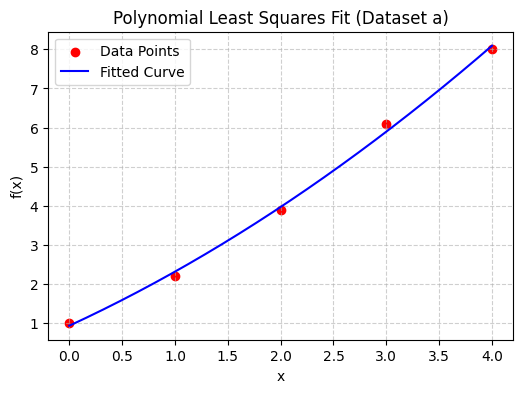

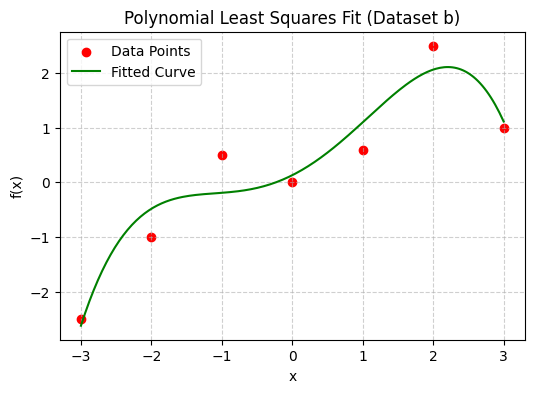

In [5]:
#Plotting without using Inbuilt Functions
import matplotlib.pyplot as plt

# --- Dataset (a) ---
x_a = [0, 1, 2, 3, 4]
y_a = [1, 2.2, 3.9, 6.1, 8.0]
degree_a = 2
coeffs_a = poly_least_squares(x_a, y_a, degree_a)

# Generate smooth x values for plotting
x_fit_a = [x_a[0] + i*(x_a[-1]-x_a[0])/199 for i in range(200)]
y_fit_a = []
for x in x_fit_a:
    y_val = sum([coeffs_a[j]*x**(degree_a-j) for j in range(degree_a+1)])
    y_fit_a.append(y_val)

# Plot Dataset (a)
plt.figure(figsize=(6,4))
plt.scatter(x_a, y_a, color='red', label='Data Points')
plt.plot(x_fit_a, y_fit_a, color='blue', label='Fitted Curve')
plt.title("Polynomial Least Squares Fit (Dataset a)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# --- Dataset (b) ---
x_b = [-3, -2, -1, 0, 1, 2, 3]
y_b = [-2.5, -1.0, 0.5, 0.0, 0.6, 2.5, 1.0]
degree_b = 4
coeffs_b = poly_least_squares(x_b, y_b, degree_b)

# Generate smooth x values for plotting
x_fit_b = [x_b[0] + i*(x_b[-1]-x_b[0])/199 for i in range(200)]
y_fit_b = []
for x in x_fit_b:
    y_val = sum([coeffs_b[j]*x**(degree_b-j) for j in range(degree_b+1)])
    y_fit_b.append(y_val)

# Plot Dataset (b)
plt.figure(figsize=(6,4))
plt.scatter(x_b, y_b, color='red', label='Data Points')
plt.plot(x_fit_b, y_fit_b, color='green', label='Fitted Curve')
plt.title("Polynomial Least Squares Fit (Dataset b)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
